In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('/content/teams (1).csv') # read the data

In [11]:
df.head()

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0


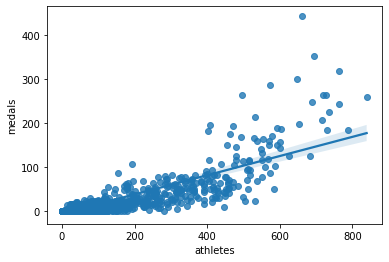

In [19]:
sns.regplot(x=df['athletes'],y=df['medals'])
plt.show()

In [25]:
X = df[['athletes','prev_medals']] # subset the orginal dataframe to include only two independent var

In [24]:
y = df[['medals']]. #target

In [27]:
X.shape,y.shape

((2014, 2), (2014, 1))

In [29]:
X['intercept'] =1.  # set y-intercept as 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
X = X[['intercept','athletes','prev_medals']]. # change the order of columns

In [33]:
X_T=X.T # transpose of X.  

In [35]:
B= np.linalg.inv(X_T@X)@X_T@y # inverse of (X.T and X) multiplied by X.T multiplied by y gives Coeff mat

In [36]:
B # coeff matrix

,medals
0,-1.961889
1,0.071112
2,0.734137


In [37]:
B.index=X.columns

In [38]:
B

,medals
intercept,-1.961889
athletes,0.071112
prev_medals,0.734137


In [40]:
pred = X @ B # predictions

In [41]:
pred[:3]

,medals
0,-1.392992
1,-1.606329
2,-1.392992


In [44]:
SSR = ((y-pred)**2).sum() # sum of squares residual

In [45]:
SST = ((y-np.mean(y))**2).sum() # sum of squares total

In [46]:
r_squared = 1- (SSR/SST)

In [47]:
r_squared

medals    0.872329
dtype: float64